# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combo_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combo_df["Mouse ID"].nunique()
print(mouse_count)


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_time_duplicates_df = combo_df[combo_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids_array = mouse_time_duplicates_df['Mouse ID'].unique()
duplicate_mouse_ids_array


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data_df = combo_df[ combo_df['Mouse ID'].isin(duplicate_mouse_ids_array) ]
duplicate_mouse_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combo_df[ ~combo_df['Mouse ID'].isin(duplicate_mouse_ids_array) ]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df["Mouse ID"].nunique()
print(clean_mouse_count)


248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

per_regimen_mean              = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
per_regimen_median            = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
per_regimen_variance          = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
per_regimen_std_deviation     = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
per_regimen_std_error_of_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

per_regimen_summary = pd.DataFrame({
  "Mean Tumor Volume"     : per_regimen_mean,
  "Median Tumor Volume"   : per_regimen_median,
  "Tumor Volume Variance" : per_regimen_variance,
  "Tumor Volume Std. Dev.": per_regimen_std_deviation,
  "Tumor Volume Std. Err.": per_regimen_std_error_of_mean
})

# Display the DataFrame
per_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Define custom aggregation functions for variance, standard deviation, and standard error of the mean
def var_func(x):
    return np.var(x)
def std_func(x):
    return np.std(x)
def sem_func(x):
    return np.std(x) / np.sqrt(len(x))

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', var_func, std_func, sem_func])

# Display DataFrame with title
print(f"\033[1m \t\t\t\t\t    Tumor Volume (mm3)")
aggregation_df


 					    Tumor Volume (mm3)


,mean,median,var_func,std_func,sem_func
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


## Bar and Pie Charts

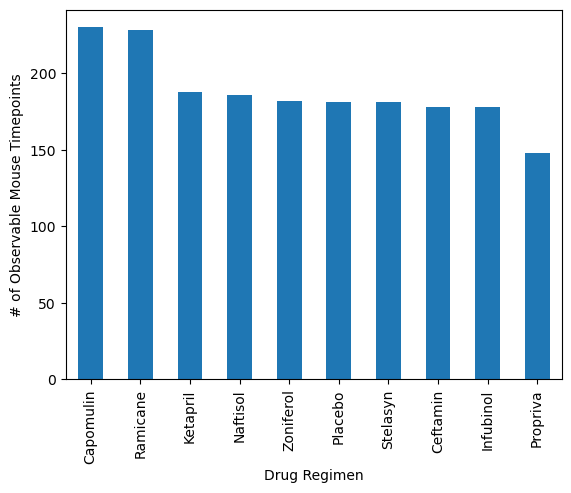

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_mouse_time_groups_series = clean_df.groupby(["Drug Regimen", "Mouse ID", "Timepoint"]).size()
regimen_observations_totals_series = regimen_mouse_time_groups_series.groupby("Drug Regimen").sum()
sorted_regimen_observations_totals_series = regimen_observations_totals_series.sort_values(ascending=False)

# Create a DataFrame from the Series for plotting
regimen_observations_df = pd.DataFrame({'values': sorted_regimen_observations_totals_series})

# Plot the DataFrame as a bar plot using Pandas
ax = regimen_observations_df.plot(kind='bar', legend=False)

# Set labels
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observable Mouse Timepoints")

# Show the plot
plt.show()


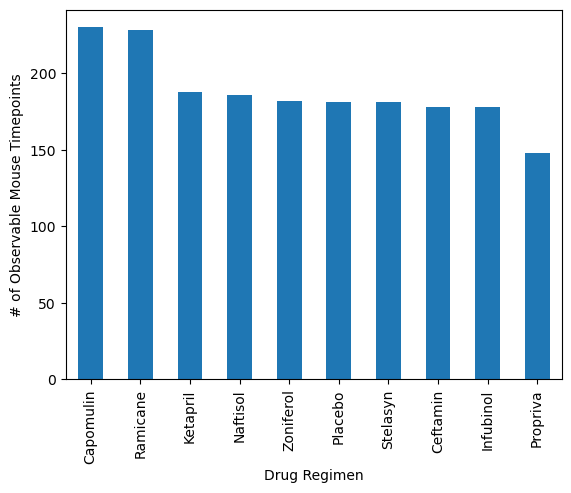

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
sorted_regimen_observations_totals_series.plot.bar()

# Add labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observable Mouse Timepoints")

# Show the plot
plt.show()


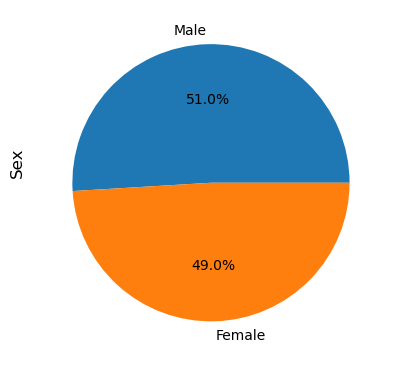

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the count of each unique value in the "Sex" column
mouse_sex_counts = clean_df['Sex'].value_counts()

# Plot a pie chart
mouse_sex_counts.plot(kind='pie', figsize=(4.5, 4.5), autopct='%1.1f%%', startangle=0, ylabel='')

# Add a title on the left side in a vertical orientation and adjust spacing
plt.title('Sex', loc='left', rotation='vertical', y=0.5, x=-.08)

# Show the pie chart
plt.show()


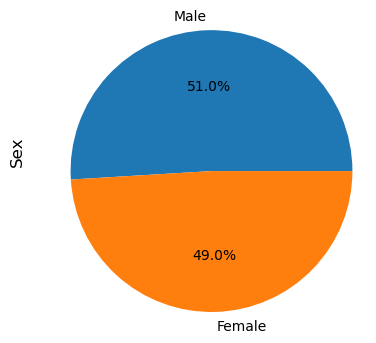

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the count of each unique value in the "Sex" column
mouse_sex_counts = clean_df['Sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(mouse_sex_counts, labels=mouse_sex_counts.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title on the left side in a vertical orientation and adjust spacing
plt.title('Sex', loc='left', rotation='vertical', y=0.5, x=-.15)

# Show the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_at_last_timepoint_df = pd.merge(clean_df, mouse_greatest_timepoint_df, on=["Mouse ID", "Timepoint"], how='inner')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_groups_of_interest_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_list = []

# loop thru the regimens that we are interested in ...
for regimen in regimen_groups_of_interest_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_tumor_volume_series = tumor_volume_at_last_timepoint_df.loc[ tumor_volume_at_last_timepoint_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)" ] 

    # append tumor data into the list that will be used later to draw the box plot
    tumor_volume_data_list.append(regimen_tumor_volume_series.tolist())

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = regimen_tumor_volume_series.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # add subset 
    # Determine outliers using upper and lower bounds
    series_lower_outliers = regimen_tumor_volume_series < lower_bound
    series_upper_outliers = regimen_tumor_volume_series > upper_bound
    all_series_outliers = series_lower_outliers | series_upper_outliers
    outliers_df = regimen_tumor_volume_series.loc[all_series_outliers]

    # output outlier info
    # print(f"Regimen: {regimen}, IQR: {iqr}, outliers are {outliers_df}")
    print(f"{regimen}'s potential outliers: {outliers_df}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


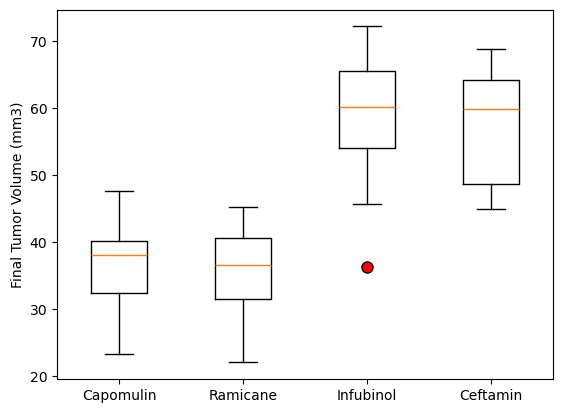

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
RED_CIRCLE_OUTLIER = {"marker":'o', "markerfacecolor":'r', "markersize":8, "linestyle":'none'}  # define the format for Red Circle outlier

plt.boxplot(tumor_volume_data_list, labels=regimen_groups_of_interest_list, flierprops=RED_CIRCLE_OUTLIER)
plt.ylabel("Final Tumor Volume (mm3)")  # Add the y-axis heading
plt.show()


## Line and Scatter Plots

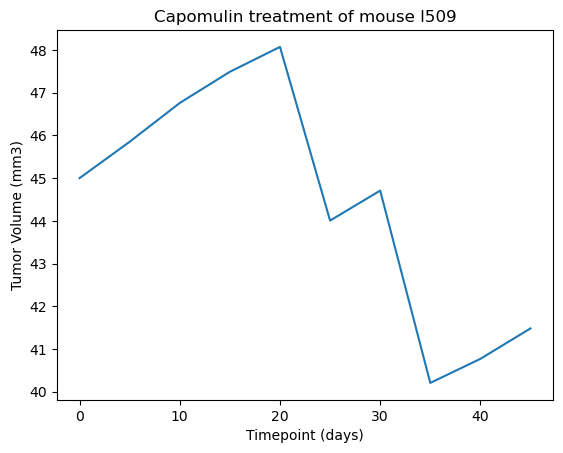

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Mouse_Id = l509
mouse_l509_df = clean_df[ (clean_df['Mouse ID'] == "l509") & (clean_df["Drug Regimen"] == "Capomulin") ]

# plot the data
plt.plot(mouse_l509_df['Timepoint'], mouse_l509_df['Tumor Volume (mm3)'])

# Add labels and a title to the chart:
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()


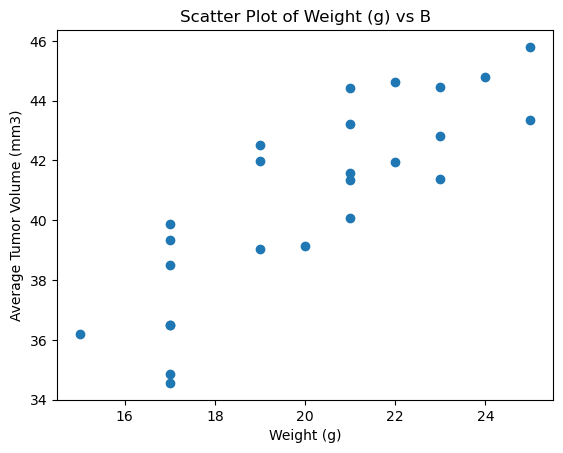

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_df[ (clean_df["Drug Regimen"] == "Capomulin") ]

# gather the data for mouse weight vs. the average tumor volume
weight_tumor_volume_df = capomulin_df.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
weight_tumor_volume_df.columns = ["Mouse ID", "Weight (g)", "Average Tumor Volume (mm3)"]
weight_tumor_volume_df = weight_tumor_volume_df.drop("Mouse ID", axis=1)

# plot the data
plt.scatter(weight_tumor_volume_df['Weight (g)'], weight_tumor_volume_df['Average Tumor Volume (mm3)'])

# Add labels and a title to the chart:
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Scatter Plot of Weight (g) vs B')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


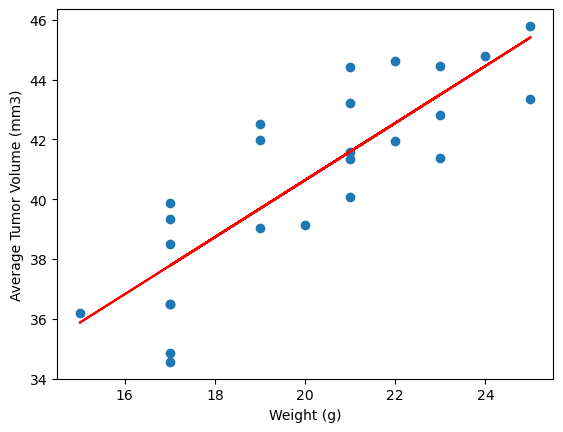

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# calculate the correlation coefficient using the corr() method in Pandas.
correlation_coefficient = weight_tumor_volume_df['Weight (g)'].corr(weight_tumor_volume_df['Average Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Plot the Data
plt.scatter(weight_tumor_volume_df['Weight (g)'], weight_tumor_volume_df['Average Tumor Volume (mm3)'])

# Calculate the slope and intercept of the regression line
slope, intercept = np.polyfit(weight_tumor_volume_df['Weight (g)'], weight_tumor_volume_df['Average Tumor Volume (mm3)'], 1)

# Plot the regression line
plt.plot(weight_tumor_volume_df['Weight (g)'], slope * weight_tumor_volume_df['Weight (g)'] + intercept, color='red')

# Add labels and a title to the chart:
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
